# Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

## Importing the required libraries

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import missingno as msno
%matplotlib inline

## Importing the dataset from the URL

In [4]:
url = 'http://bit.ly/w-data'
df = pd.read_csv(url)
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


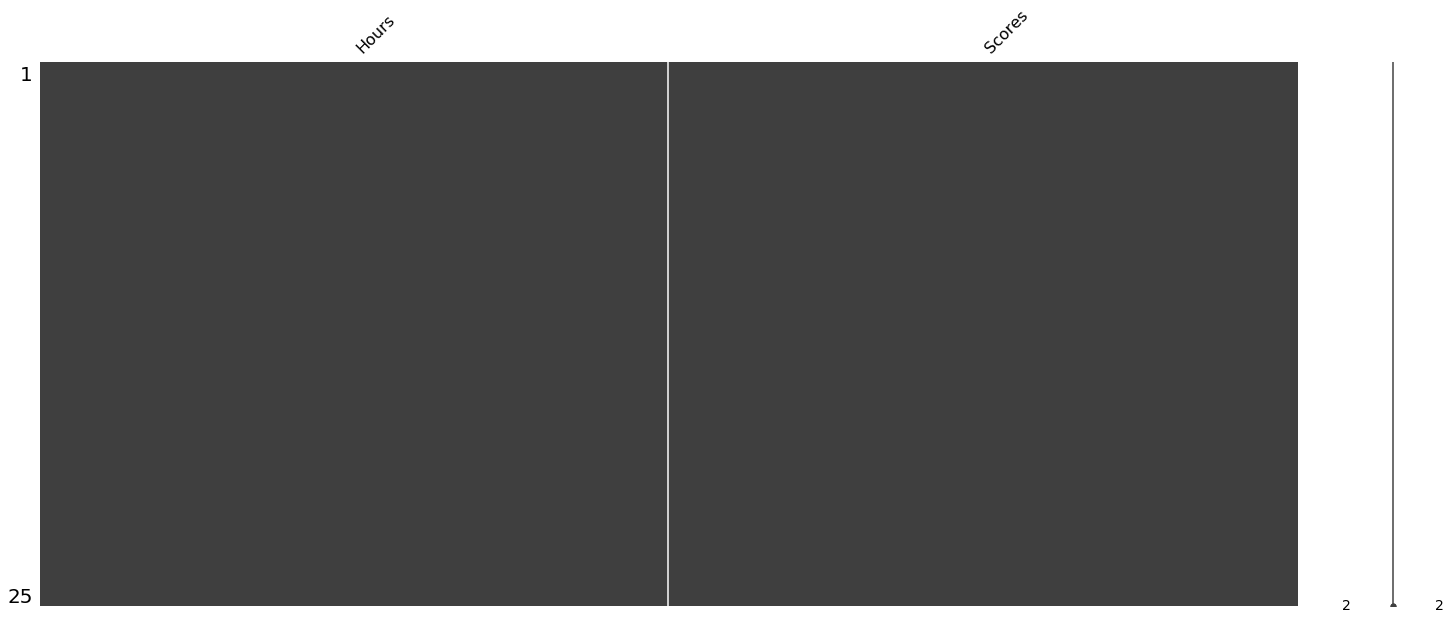

In [8]:
#Checking for any null values
msno.matrix(df)

As we can see that there is no null values in dataset

## Visualization of Dataset

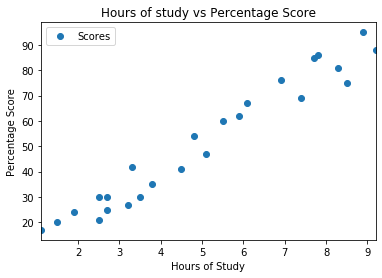

In [10]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours of study vs Percentage Score')  
plt.xlabel('Hours of Study')  
plt.ylabel('Percentage Score')  
plt.show()

# Linear Regreesion Model

## Preparing the Data and Split it in training data and test data 80-20% using sklearn

In [20]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

## Training the model

In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

## Visualising Training and Test Results

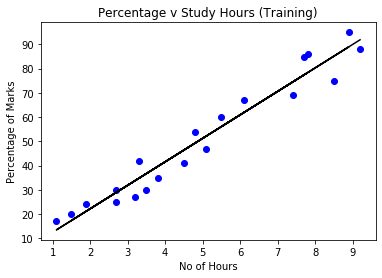

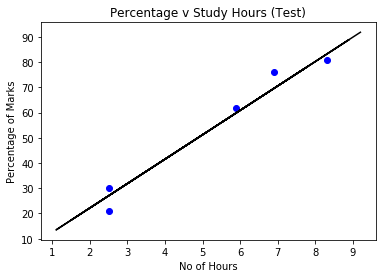

In [22]:
#plotting best fit line on the data
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, regressor.predict(X_train), color = 'black')
plt.title('Percentage v Study Hours (Training)')
plt.xlabel('No of Hours')
plt.ylabel('Percentage of Marks')
plt.show()

plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_train, regressor.predict(X_train), color = 'black')
plt.title('Percentage v Study Hours (Test)')
plt.xlabel('No of Hours')
plt.ylabel('Percentage of Marks')
plt.show()

## Getting the accuracy scores for training and test set

In [25]:
print('Training score')
print(regressor.score(X_train, y_train))
print('Test score')
print(regressor.score(X_test, y_test))

Training score
0.9491209376364417
Test score
0.9678055545167994


## Comparision dataframe between y_pred and y_test

In [27]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [29]:
#predicting the score for 9.25 hours
print("score of student who studies 9.25 hours a day",regressor.predict([[9.25]]))

score of student who studies 9.25 hours a day [92.38611528]


##  Model Evaluation Metrics

In [31]:
#checking efficiency of model
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,  y_pred))
print('MSE:', metrics.mean_squared_error(y_test,  y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,  y_pred)))

MAE: 3.9207511902099244
MSE: 18.943211722315272
RMSE: 4.352380006653288
